In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 1. Membaca dataset
df = pd.read_csv(r"C:\Users\OPTION\Downloads\Python DA\[BELUM UPLOAD] Projects 31_E-commerce Business Transaction (2018 - 2019)\Sales Transaction v.4a.csv")
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [8]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (536350, 8)


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [10]:
# Inspeksi awal
print("Informasi dataset:")
print(df.info())
print("\nJumlah duplikat:", df.duplicated().sum())
print("\nMissing values per kolom:")
print(df.isnull().sum())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB
None

Jumlah duplikat: 5200

Missing values per kolom:
TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64


In [11]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Mengembalikan dataframe dengan nilai pada kolom 'col' yang berada di dalam batas IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Simpan data sebelum cleaning untuk perbandingan
df_before = df.copy()

# Hapus duplikat
df = df.drop_duplicates()

# Hapus missing values (misal: pada CustomerNo)
df = df.dropna()

# Ubah kolom Date menjadi datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Hapus outlier untuk kolom Price dan Quantity
df = remove_outliers(df, 'Price')
df = remove_outliers(df, 'Quantity')

Text(0.5, 1.0, 'Boxplot Price - Sebelum Cleaning')

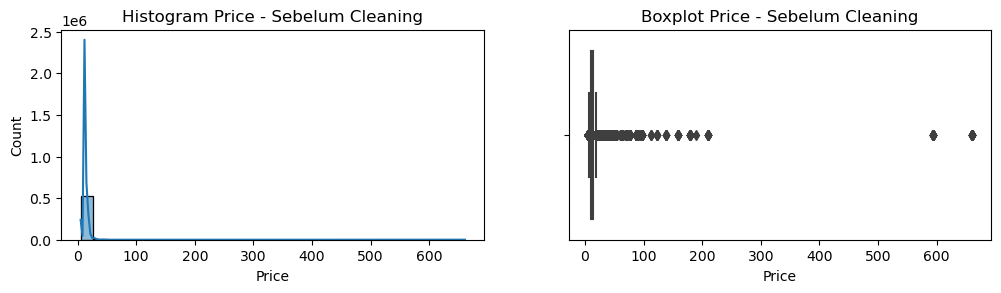

In [12]:
# Visualisasi untuk Price
plt.figure(figsize=(12, 6))

# Histogram dan boxplot sebelum cleaning
plt.subplot(2, 2, 1)
sns.histplot(df_before['Price'], kde=True, bins=30)
plt.title('Histogram Price - Sebelum Cleaning')

plt.subplot(2, 2, 2)
sns.boxplot(x=df_before['Price'])
plt.title('Boxplot Price - Sebelum Cleaning')

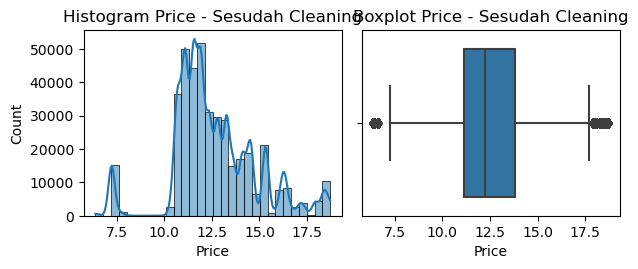

In [13]:
# Histogram dan boxplot setelah cleaning
plt.subplot(2, 2, 3)
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Histogram Price - Sesudah Cleaning')

plt.subplot(2, 2, 4)
sns.boxplot(x=df['Price'])
plt.title('Boxplot Price - Sesudah Cleaning')

plt.tight_layout()
plt.show()

In [14]:
cleaned_filename = 'Sales Transaction v.4a-CLEANED.csv'
df.to_csv(cleaned_filename, index=False)
print(f"Dataset cleaned telah disimpan sebagai {cleaned_filename}")

Dataset cleaned telah disimpan sebagai Sales Transaction v.4a-CLEANED.csv


In [15]:
# Menambahkan kolom Profit
df['Profit'] = df['Price'] * df['Quantity']
# Metrik
total_transactions = len(df)
total_profit = df['Profit'].sum()
total_customers = df['CustomerNo'].count()  # total record customer (non-null)
total_unique_customers = df['CustomerNo'].nunique()
total_unique_products = df['ProductNo'].nunique()

print("Total Transactions:", total_transactions)
print("Total Profit: £", total_profit)
print("Total Customers:", total_customers)
print("Total Unique Customers:", total_unique_customers)
print("Total Unique Products:", total_unique_products)

Total Transactions: 408889
Total Profit: £ 29682653.160000008
Total Customers: 408889
Total Unique Customers: 4558
Total Unique Products: 3612


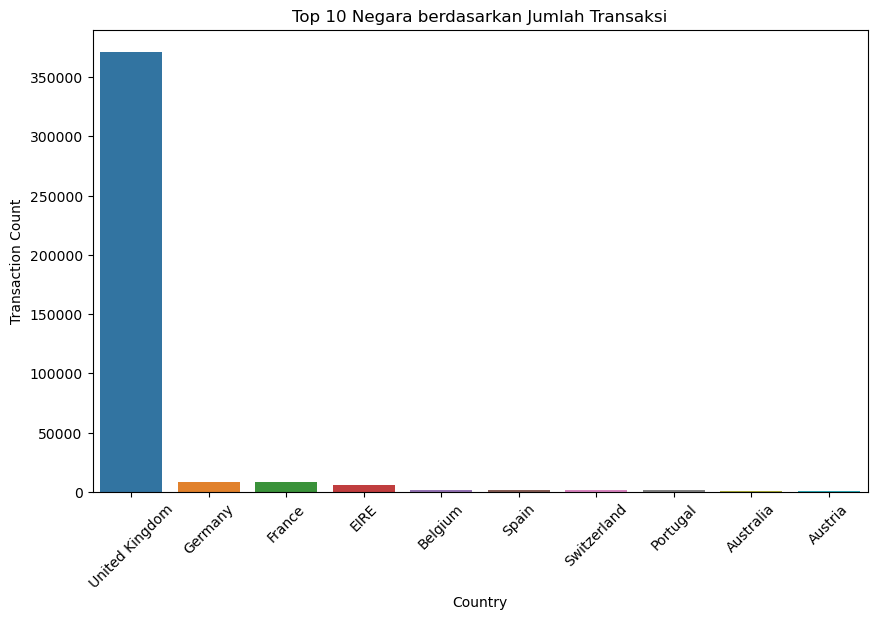

In [16]:
# Top 10 negara berdasarkan jumlah transaksi
country_counts = df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Negara berdasarkan Jumlah Transaksi')
plt.xlabel('Country')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()

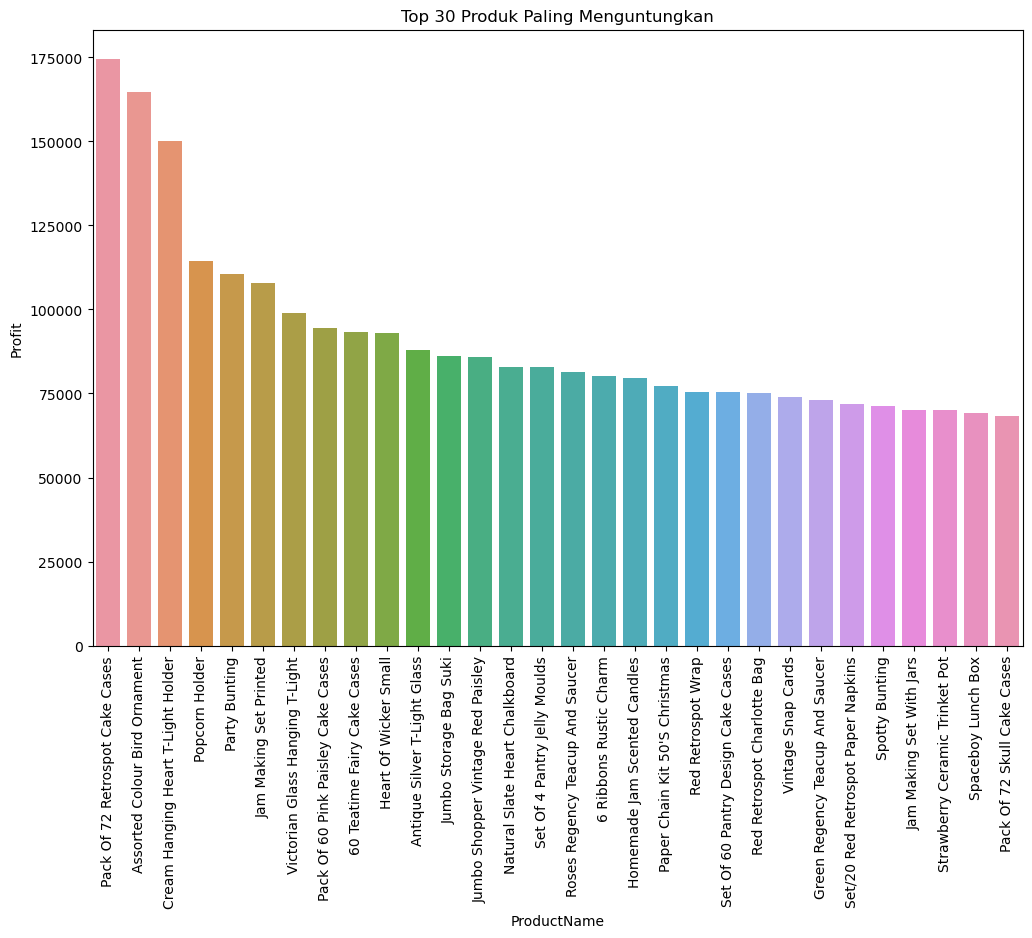

In [21]:
# Agregasi profit per produk
profit_products = df.groupby('ProductName')['Profit'].sum().sort_values(ascending=False).head(30)

plt.figure(figsize=(12, 8))
sns.barplot(x=profit_products.index, y=profit_products.values)
plt.title('Top 30 Produk Paling Menguntungkan')
plt.xlabel('ProductName')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.show()

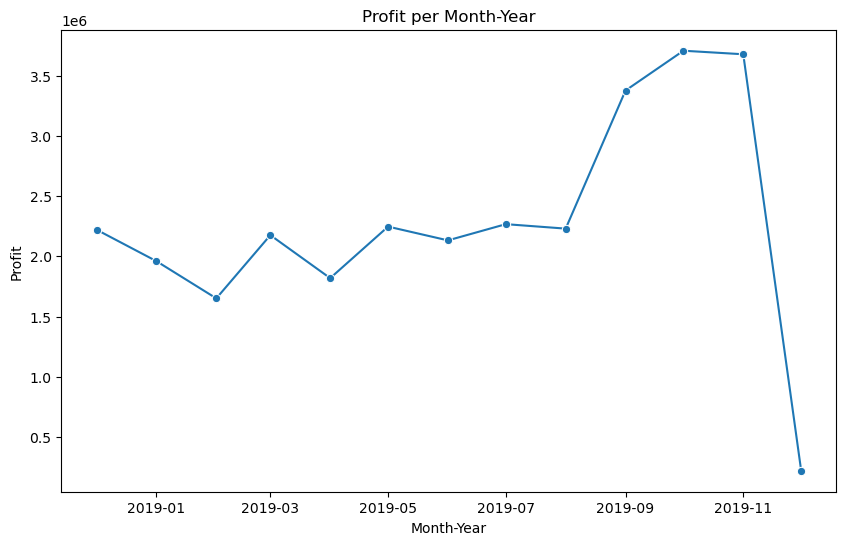

In [25]:
# Ekstrak Month-Year dari Date
# Konversi kolom Date dan bersihkan nilai yang tidak valid
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

# Buat kolom Profit jika belum ada
df['Profit'] = df['Price'] * df['Quantity']

# Ekstrak Month-Year dan ubah ke timestamp agar bisa dipakai untuk plotting
df['MonthYear'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Hitung profit per Month-Year
profit_month = df.groupby('MonthYear')['Profit'].sum().reset_index()

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='MonthYear', y='Profit', data=profit_month, marker='o')
plt.title('Profit per Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Profit')
plt.xticks(rotation=0)
plt.show()

MonthYear           datetime64[ns]
TransactionCount             int64
dtype: object


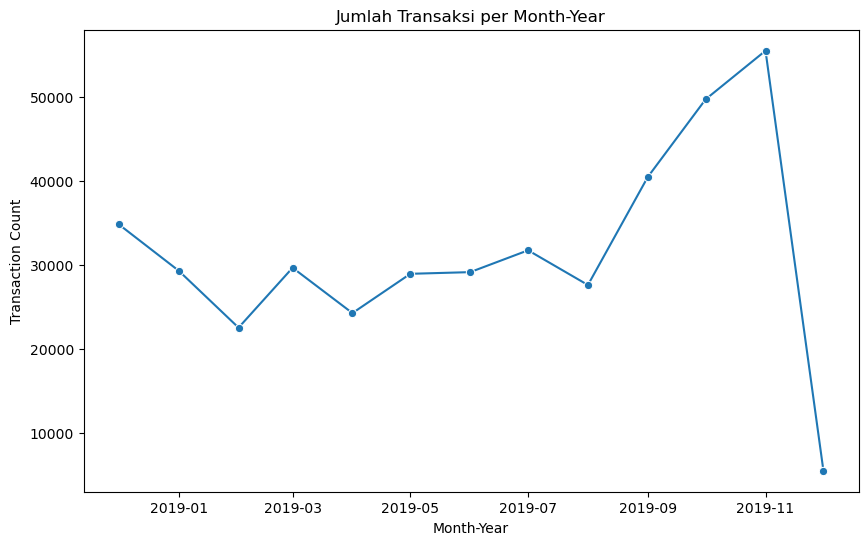

In [27]:
# Jumlah transaksi per Month-Year
# Konversi kolom Date ke tipe datetime dan hapus nilai yang tidak valid
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

# Ekstrak Month-Year dan ubah menjadi timestamp
df['MonthYear'] = df['Date'].dt.to_period('M').dt.to_timestamp()
count_month = df.groupby('MonthYear').size().reset_index(name='TransactionCount')
print(count_month.dtypes)  # Pastikan kolom MonthYear bertipe datetime64[ns]
plt.figure(figsize=(10, 6))
sns.lineplot(x='MonthYear', y='TransactionCount', data=count_month, marker='o')
plt.title('Jumlah Transaksi per Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Transaction Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# import dash
# from dash import dcc, html
# import plotly.express as px

# # Buat figure dengan Plotly untuk masing-masing grafik
# fig_country = px.bar(x=country_counts.index, y=country_counts.values,
#                      title="Top 10 Negara berdasarkan Jumlah Transaksi",
#                      labels={'x': 'Country', 'y': 'Transaction Count'})

# fig_profit_products = px.bar(x=profit_products.index, y=profit_products.values,
#                              title="Top 30 Produk Paling Menguntungkan",
#                              labels={'x': 'ProductNo', 'y': 'Profit'})

# fig_profit_month = px.line(profit_month, x='MonthYear', y='Profit',
#                            title="Profit per Month-Year", markers=True)

# fig_count_month = px.line(count_month, x='MonthYear', y='TransactionCount',
#                           title="Jumlah Transaksi per Month-Year", markers=True)

# # Inisialisasi aplikasi Dash
# app = dash.Dash(__name__)
# app.layout = html.Div(children=[
#     html.H1(children='Sales Transaction Dashboard'),

#     html.Div(children=[
#         html.H3(f'Total Transactions: {total_transactions}'),
#         html.H3(f'Total Profit: £{total_profit:.2f}'),
#         html.H3(f'Total Customers: {total_customers}'),
#         html.H3(f'Total Unique Customers: {total_unique_customers}'),
#         html.H3(f'Total Unique Products: {total_unique_products}')
#     ], style={'margin': '20px'}),

#     dcc.Graph(figure=fig_country),
#     dcc.Graph(figure=fig_profit_products),
#     dcc.Graph(figure=fig_profit_month),
#     dcc.Graph(figure=fig_count_month)
# ])

# if __name__ == '__main__':
#     app.run_server(debug=True)
